# 주성분 분석 (PCA: Principal Component Analysis)
- 다차원의 데이터를 저차원의 데이터로 환원시키는 기법


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np

fruits = np.load("../Data/fruits.npy")
fruits.shape

(300, 100, 100)

In [3]:
# 2차원 배열로 변경
fruits_2d = fruits.reshape(-1, 100*100)

In [5]:
fruits_2d.shape

(300, 10000)

# PCA 모델 구성하기

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) # 300개의 데이터 중 구별이 확실한 주성분 50개 선택(Feature들 중 특징을 포함하여 구성)
pca.fit(fruits_2d)

PCA(n_components=50)

In [8]:
# 축소된 차원 크기 확인하기
pca.components_.shape

(50, 10000)

In [9]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr) # n은 샘플 개수
  # 한 줄에 10개씩 이미지 그리기, 샘플 개수를 10으로 나누어 전체 행 개수를 계산
  rows = int(np.ceil(n/10)) # 올림처리
  # 행이 1개이면 열 개수가 샘플 개수이고 그렇지 않으면 10개
  cols = n if rows < 2 else 10

  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n: # n개까지만 그린다.
        axs[i, j].imshow(arr[i*10 + j], cmap="gray_r")
      axs[i,j].axis("off")
  
  plt.show()

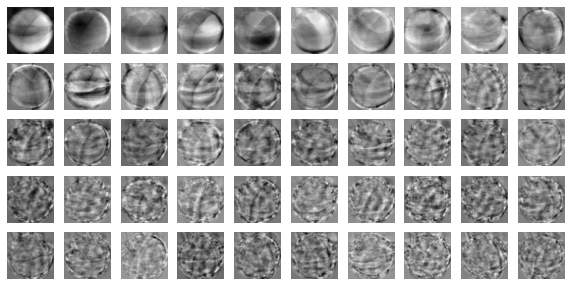

In [10]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [11]:
# 행의 개수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
print(fruits_2d.shape) # 원본크기
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


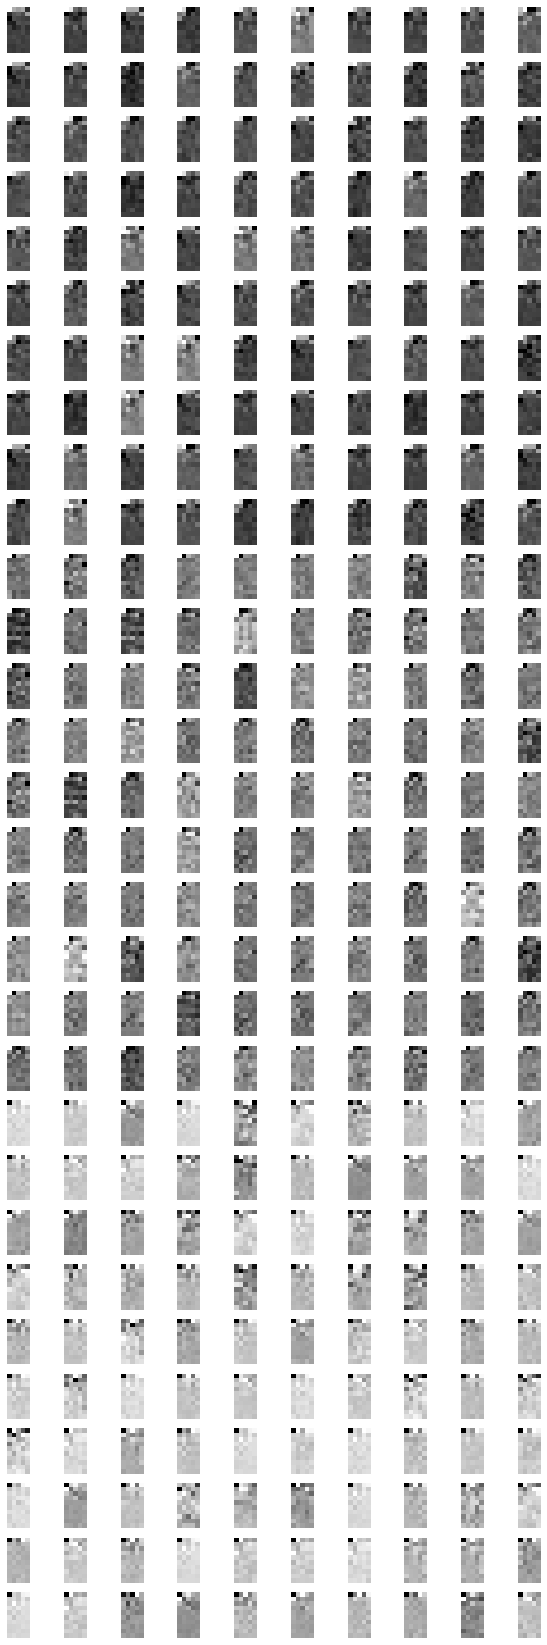

In [12]:
draw_fruits(fruits_pca.reshape(-1,10,5))

---
# 원본 데이터 재구성

In [14]:
fruits_inverse = pca.inverse_transform(fruits_pca)

In [17]:
fruits_inverse.shape

(300, 10000)

In [18]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
fruits_reconstruct.shape

(300, 100, 100)

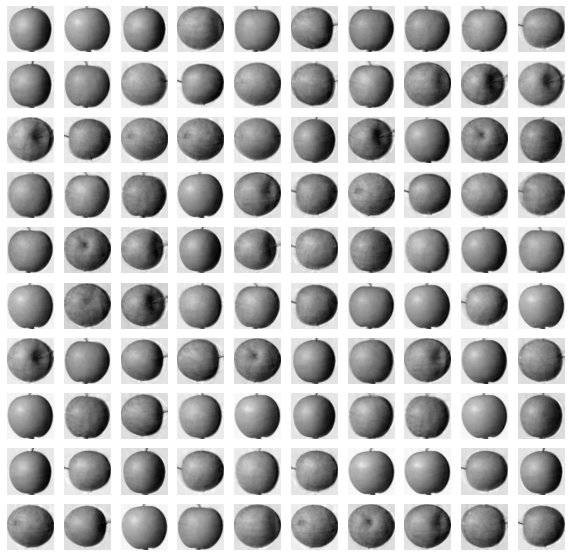

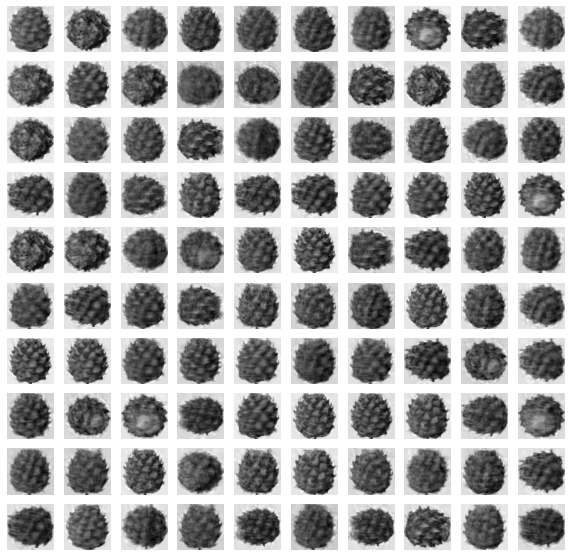

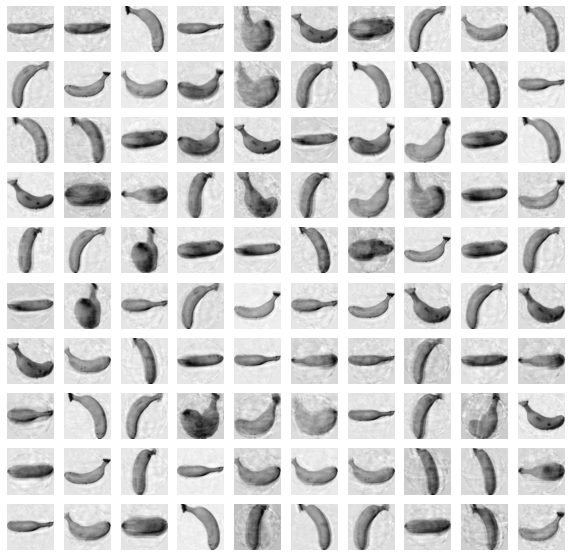

In [20]:
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

> 1/200의 데이터 특성만 가지고도 전반적으로 배경은 깨끗하지 않으나 물체의 구분은 가능하다

---
# 설명된 분산
: 주성분으로 구성할 때 원본 데이터의 분산(이미지의 분산 = 이미지의 크기)을 어느정도 유지하고 있었는지 확인하는 방법

In [21]:
np.sum(pca.explained_variance_ratio_) # 50개의 주성분 데이터 

0.9223251756728688

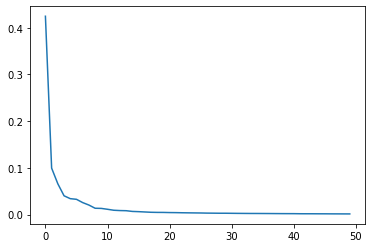

In [22]:
# 그래프그리기
plt.plot(pca.explained_variance_ratio_)
plt.show()

> 10개 정도만 주성분을 잡아도 문제 없을 것 같아 보인다.

---
# 주성분을 10개만 정의해서 해보자

In [23]:
pca10 = PCA(n_components=10)
pca10.fit(fruits_2d)

PCA(n_components=10)

In [25]:
fruits_pca10 = pca10.transform(fruits_2d)
fruits_pca10.shape

(300, 10)

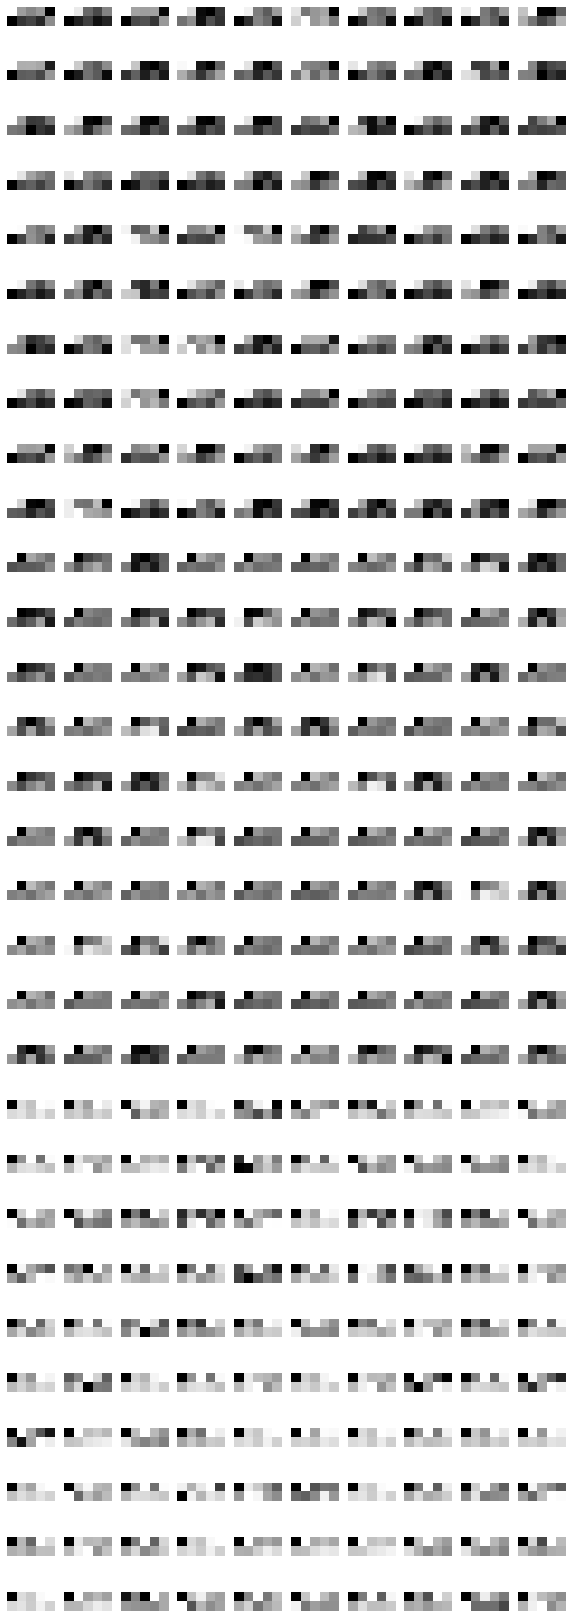

In [27]:
draw_fruits(fruits_pca10.reshape(-1,2,5))

In [28]:
fruits_inverse10 = pca10.inverse_transform(fruits_pca10)
fruits_inverse10.shape

(300, 10000)

In [29]:
fruits_reconstruct10 = fruits_inverse10.reshape(-1, 100, 100)

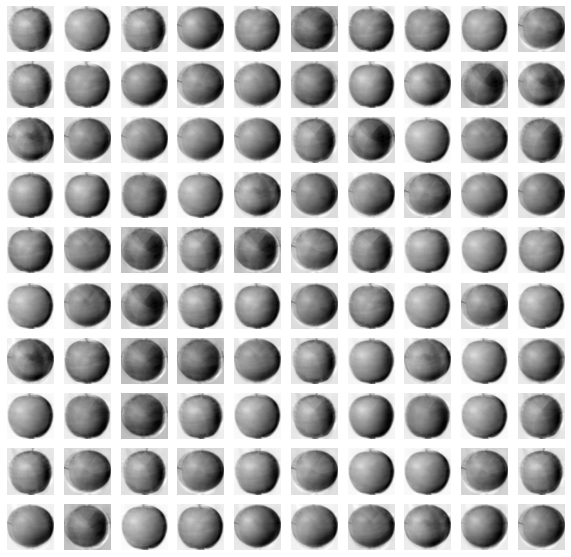

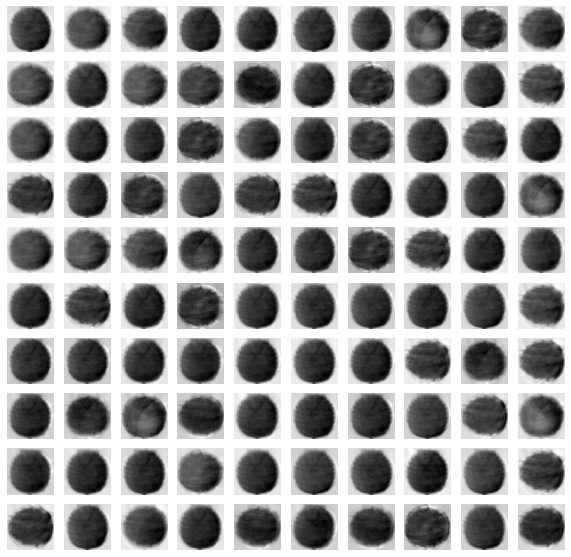

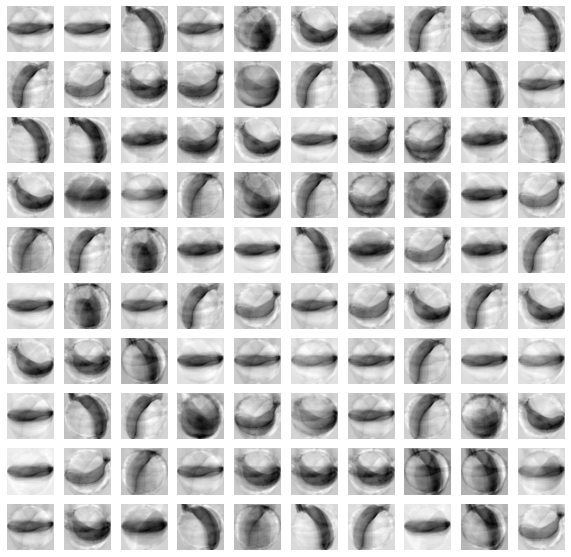

In [30]:
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct10[start:start+100])
  print("\n")

In [31]:
np.sum(pca10.explained_variance_ratio_)

0.7711096057795515

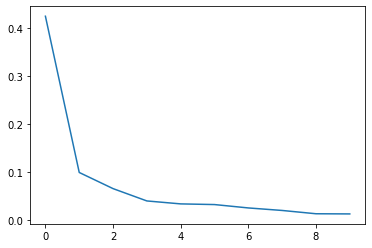

In [32]:
plt.plot(pca10.explained_variance_ratio_)

---
# 로지스틱 회귀본석에 주성분 분석을 대입하여 사용해보기

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [34]:
# 로지스틱 회귀분석은 지도학습이므로 target이 필요하다
target = np.array([0]*100 + [1]*100 + [2]*100)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
# 교차검증을 실시
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
0.42073941230773926


> 정확도는 99.7% 정도이며, 계산에 필요한 시간은 0.4초 정도 나왔다.

In [37]:
# 300 * 50로 구성된 주성분 분석으로 구성된 데이터로 확인
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

1.0
0.039643383026123045


> 정확도는 100%정도이며, 계산에 필요한 시간은 0.04초이다.

In [38]:
scores

{'fit_time': array([0.08309388, 0.029145  , 0.02326608, 0.02012706, 0.0425849 ]),
 'score_time': array([0.00077987, 0.00038624, 0.00030684, 0.00028801, 0.00029016]),
 'test_score': array([1., 1., 1., 1., 1.])}

---
# 주성분 분석의 분산의 크기를 정해 사용하기

In [40]:
pca = PCA(n_components=0.5) # n_components를 실수로 정하면 분산의 percentage 정도로 나타낸다
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [41]:
print(pca.n_components_)

2


> 필요한 주성분 Feature를 2개로 사용    
> 주성분 2개면 그래프로 표현이 가능하다.

In [42]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [43]:
# 교차검증으로 확인
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9933333333333334
0.035534000396728514


> 정확도는 99.3% 이며 계산 시간은 0.04초 이다.

In [45]:
# 주성분의 값을 알아보자
pcaComponents = pca.fit_transform(fruits_2d)

# 데이터 프레임 구성
import pandas as pd
pcaDf = pd.DataFrame(data=pcaComponents, columns=["PCA1", "PCA2"])
pcaDf.head()

,PCA1,PCA2
0,-2776.498471,-1580.322486
1,-3075.909684,-2734.476728
2,-2616.828977,-1496.477291
3,-3113.625578,-2527.080543
4,-2519.267133,-2323.854018


---
# k-Means에 주성분 분석 적용해보기

In [46]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [47]:
# 군집 개수와 빈도수 확인하기
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

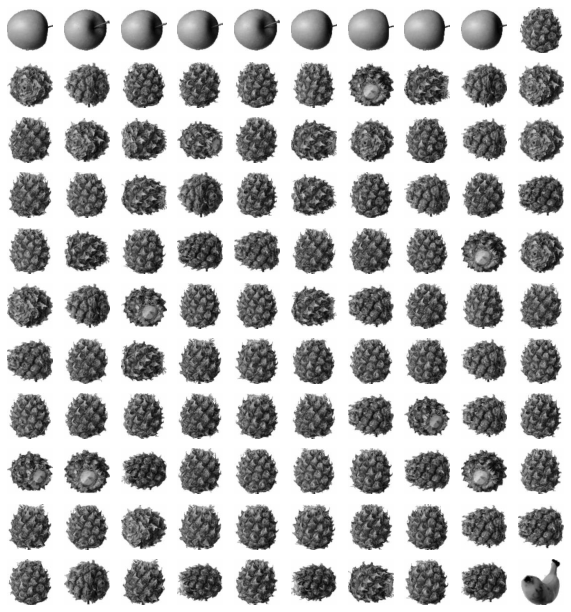

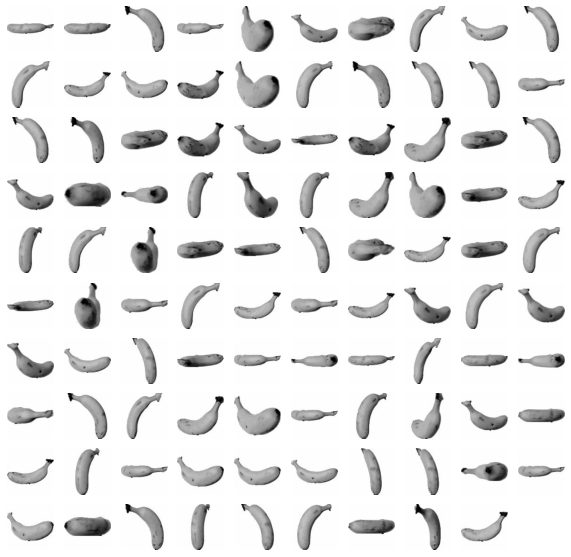

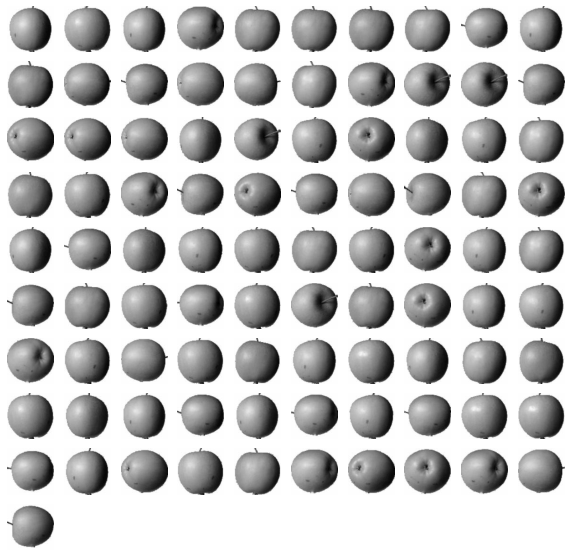

In [48]:
# 그림으로 확인하기
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

---
# 산포도 확인해보기


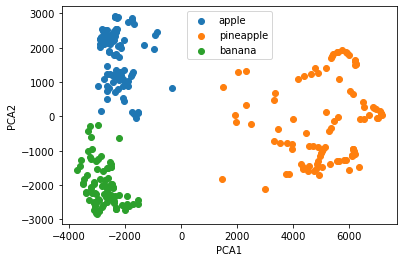

In [50]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(["apple", "pineapple", "banana"])
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()